In [102]:
import torch 
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

# Use gpu if available


In [103]:
if torch.cuda.is_available():
    device = 'cuda'
else: 
    device='cpu'
print("Using: "+ device)

Using: cuda


# Data prep
* Using linear regression 
* Step 1 in ML_process
y = wight * X + bias (y=mx+b) 

In [104]:
weight = .7
bias = .3

# create the range
X = torch.arange(0,1,.02).unsqueeze(dim=1) # remember to unsquezze or errors will happen
y = weight * X + bias # setting the linear regression 
X[:10], y[:10] # prints the first 10 of each

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

# Splitting the data
* also part of step 1 in ML process

In [105]:
train_split = int(0.8 * len(X)) # puts 80% of data in training
X_train, y_train = X[:train_split], y[:train_split] # puts the first 80% of X in X_train (same thing happens for Y_train)
X_test, y_test = X[train_split:], y[train_split:] # puts the remaining in to the respective places
X_train.shape, y_train.shape, X_test.shape, y_test.shape # checking the values

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

# Plotting

In [106]:
# plotting the data
def plot_predictions(train_data = X_train,
                     train_label = y_train, 
                     test_data = X_test,
                     test_label = y_test,
                     predictions = None):
    plt.figure(figsize=(10,7))

    # Training date (blue)
    plt.scatter(train_data,
                train_label,
                c='blue',
                s=4,
                label= "Training data")
    # Testing data (green)
    plt.scatter(test_data,
                test_label,
                c='green',
                s=4,
                label="Testing data")
    # Prediction data (red)
    if predictions is not None: 
        plt.scatter(test_data,
                    predictions,
                    c='red',
                    s=4,
                    label="Predictions")
    plt.legend()

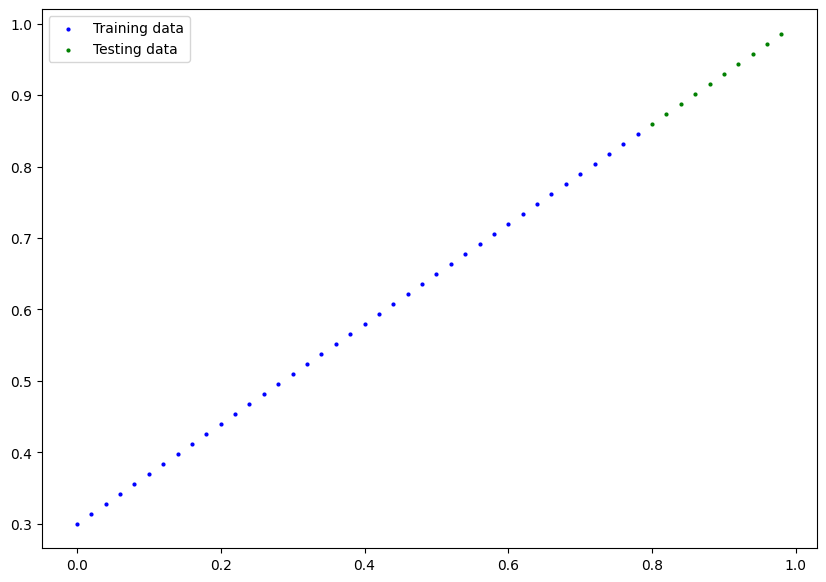

In [107]:
plot_predictions(X_train, y_train,X_test,y_test)

# LinearRegressionModel 
* creating a linear model by using a sub classing nn.Model
* step 1 of ML process

In [108]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self): # constructor
        super().__init__() # initialize the constructor 

        # use nn.Linear() for creating the model parameters / also called: linear transform, probing layer, etc... 
        # This is using a pre-existing model 
        self.linear_layer = nn.Linear(in_features=1, # takes in input of size 1
                                      out_features=1) # output of size 1

        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

# Training the data
Step 2 ML process:
* loss function (2.1)
* Optimizer (2.1)
* Training loop (2.2)
* Testing loop (2.2)


In [109]:
# moving the model to the gpu if available
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [110]:
# setting up loss function 2.1
loss_fn = nn.L1Loss()

# setting optimizer 2.1
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [111]:
# setting up the predictions
with torch.inference_mode():
    y_preds = model_1(X_train.to(device)) # all device must be on the same one.
y_preds[:5]

tensor([[0.8300],
        [0.8453],
        [0.8606],
        [0.8759],
        [0.8912]], device='cuda:0')

# Training Loop 
step 2.2

In [112]:
# training loop
torch.manual_seed(42)

epochs = 200
# putting data on device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train() # built in train in pytorch

    # 1. forward pass
    y_preds = model_1(X_train)

    # 2. calculating the loss
    loss = loss_fn(y_preds, y_train)

    # 3. optimizer.zero_grad()
    optimizer.zero_grad()  # clear the gradients from the last step (if any)
    
    # 4. perform backpropagation 
    loss.backward()

    # 5. optimizer step 
    optimizer.step() # this is what decides which way to move so that it can become closer to the hyperparameters (weight, bias)

    # Testing
    model_1.eval() # always put this when testing (good practice)
    with torch.inference_mode():
        test_pred = model_1 (X_test) # repeat step 1 with testing data
        test_loss = loss_fn(test_pred, y_test) # repeating step 2 with testing data

        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}") 

    

Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test Loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test Loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test Loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test Loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test Loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test Loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test Loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test Loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416

In [113]:
model_1.state_dict(), weight, bias

(OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.3025], device='cuda:0'))]),
 0.7,
 0.3)

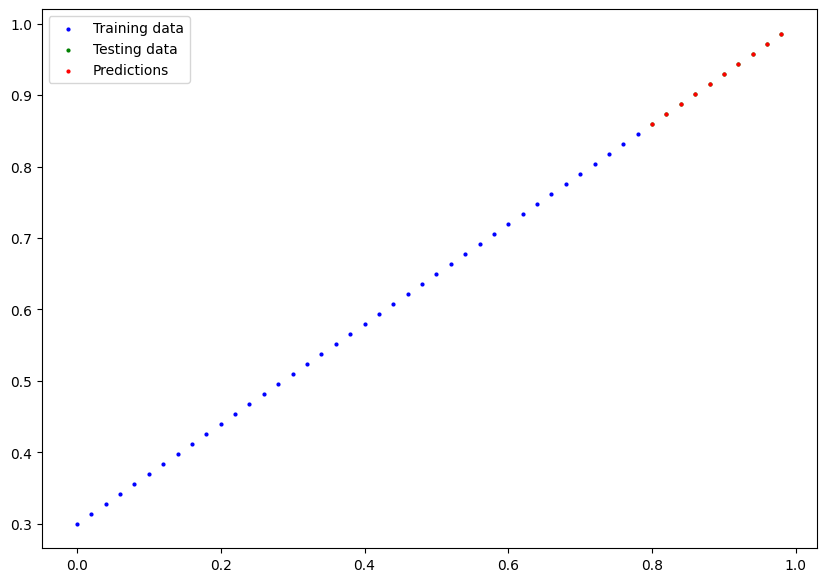

In [114]:
# visualizing how close we are
plot_predictions(predictions = test_pred.cpu())

# Saving and loading the model

In [115]:
# saving the state dictionary of model_1

# where i'm saving it
from pathlib import Path
model_path = Path('models') 
model_path.mkdir(parents= True, exist_ok=True) # create folder or if exist use folder

# create the path
model_name = "formal_workflow_model_state_dict.pt"
model_save_path = model_path/model_name

# saving 
torch.save(obj= model_1.state_dict(),
           f=model_save_path)

# Loading the model

In [116]:
# create a new instance of the model
loaded_model_1 = LinearRegressionModelV2()

# ^ f is equal to where the computer should look for this info
loaded_model_1.load_state_dict(torch.load(f=model_save_path))

# put the load model model to device
loaded_model_1.to(device)

C:\Users\lonnh\AppData\Local\Temp\ipykernel_18400\1144395256.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(f=model_save_path)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [117]:
print(f"The saved and loaded model is:\n {loaded_model_1.state_dict()}")
print(f"\nNot saved state dictionary is:\n {model_1.state_dict()}")

The saved and loaded model is:
 OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')), ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

Not saved state dictionary is:
 OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')), ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])


In [118]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [125]:
# evalualte the loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
loaded_model_1_preds[:5]

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157]], device='cuda:0')

In [127]:
with torch.inference_mode():
    y_preds = model_1(X_test.to(device))
y_preds[:5]

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157]], device='cuda:0')

In [126]:
y_preds[:5] == loaded_model_1_preds[:5]

tensor([[True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')